# Chapter 3. Linear algebra in practice

In [1]:
import numpy as np

x = np.array([1.8, -4.5, 9.2, 7.3])
y = np.array([-5.2, -1.1, 0.7, 5.1])

In [2]:
def add(x: np.ndarray, y: np.ndarray):
    x_plus_y = np.zeros(shape=len(x))
    
    for i in range(len(x_plus_y)):
        x_plus_y[i] = x[i] + y[i]
        
    return x_plus_y

In [5]:
add(x, y)
#add?

array([-3.4, -5.6,  9.9, 12.4])

In [6]:
np.equal(x + y, add(x, y))

array([ True,  True,  True,  True])

In [7]:
1.0 == 0.3*3 + 0.1

False

In [8]:
0.3*3 + 0.1

0.9999999999999999

In [9]:
all(np.equal(x + y, add(x, y)))

True

## Vectors in NumPy

In [10]:
def just_a_quadratic_polynomial(x):
    return 3*x**2 + 1

In [11]:
x = np.array([1.8, -4.5, 9.2, 7.3])
just_a_quadratic_polynomial(x)

array([ 10.72,  61.75, 254.92, 160.87])

In [12]:
from math import exp

exp(x)

TypeError: only length-1 arrays can be converted to Python scalars

In [13]:
def naive_exp(x: np.ndarray):
    x_exp = np.empty_like(x)
    
    for i in range(len(x)):
        x_exp[i] = exp(x[i])
        
    return x_exp

In [14]:
naive_exp(x)

array([6.04964746e+00, 1.11089965e-02, 9.89712906e+03, 1.48029993e+03])

In [15]:
def bit_less_naive_exp(x: np.ndarray):
    return np.array([exp(x_i) for x_i in x])

In [16]:
bit_less_naive_exp(x)

array([6.04964746e+00, 1.11089965e-02, 9.89712906e+03, 1.48029993e+03])

In [17]:
np.exp(x)

array([6.04964746e+00, 1.11089965e-02, 9.89712906e+03, 1.48029993e+03])

In [18]:
all(np.equal(naive_exp(x), np.exp(x)))

True

In [19]:
all(np.equal(bit_less_naive_exp(x), np.exp(x)))

True

In [20]:
from timeit import timeit


n_runs = 100000
size = 1000


t_naive_exp = timeit(
    "np.array([exp(x_i) for x_i in x])",
    setup=f"import numpy as np; from math import exp; x = np.ones({size})",
    number=n_runs
)

t_numpy_exp = timeit(
    "np.exp(x)",
    setup=f"import numpy as np; from math import exp; x = np.ones({size})",
    number=n_runs
)


print(f"Built-in exponential:    \t{t_naive_exp:.5f} s")
print(f"NumPy exponential:       \t{t_numpy_exp:.5f} s")
print(f"Performance improvement: \t{t_naive_exp/t_numpy_exp:.5f} times faster")

Built-in exponential:    	39.17395 s
NumPy exponential:       	1.88472 s
Performance improvement: 	20.78503 times faster


In [21]:
def naive_sum(x: np.ndarray):
    val = 0
    
    for x_i in x:
        val += x_i
        
    return val

In [22]:
naive_sum(x)

np.float64(13.799999999999999)

In [23]:
sum(x)

np.float64(13.799999999999999)

In [24]:
np.sum(x)

np.float64(13.799999999999999)

In [25]:
x.sum()

np.float64(13.799999999999999)

In [26]:
t_naive_sum = timeit(
    "sum(x)",
    setup=f"import numpy as np; x = np.ones({size})",
    number=n_runs
)

t_numpy_sum = timeit(
    "np.sum(x)",
    setup=f"import numpy as np; x = np.ones({size})",
    number=n_runs
)


print(f"Built-in sum:            \t{t_naive_sum:.5f} s")
print(f"NumPy sum:               \t{t_numpy_sum:.5f} s")
print(f"Performance improvement: \t{t_naive_sum/t_numpy_sum:.5f} times faster")

Built-in sum:            	19.33090 s
NumPy sum:               	1.27225 s
Performance improvement: 	15.19428 times faster


In [27]:
np.prod(x)

np.float64(-543.996)

### Norms, distances, and dot products

In [28]:
def euclidean_norm(x: np.ndarray):
    return np.sqrt(np.sum(x**2))

In [29]:
x = np.array([-3.0, 1.2, 1.2, 2.1])    # a 1D array with 4 elements, which is a vector in 4-dimensional space
y = np.array([8.1, 6.3])               # a 1D array with 2 elements, which is a vector in 2-dimensional space

In [30]:
euclidean_norm(x)

np.float64(4.036087214122113)

In [31]:
euclidean_norm(y)

np.float64(10.261578825892242)

In [32]:
np.linalg.norm(x)

np.float64(4.036087214122113)

In [33]:
np.equal(euclidean_norm(x), np.linalg.norm(x))

np.True_

In [34]:
type(np.inf)

float

In [35]:
def p_norm(x: np.ndarray, p: float):
    if np.isinf(p):
        return np.max(np.abs(x))
    elif p >= 1:
        return (np.sum(np.abs(x)**p))**(1/p)
    else:
        raise ValueError("p must be a float larger or equal than 1.0 or inf.")

In [37]:
x = np.array([-3.0, 1.2, 1.2, 2.1])

for p in [1, 2, 42, np.inf]:
    print(f"{p}-norm for p = {p}: \t {p_norm(x, p=p):.5f}")

1-norm for p = 1: 	 7.50000
2-norm for p = 2: 	 4.03609
42-norm for p = 42: 	 3.00000
inf-norm for p = inf: 	 3.00000


In [38]:
for p in [1, 2, 42, np.inf]:
    print(f"p-norm for p = {p}: \t {np.linalg.norm(x, ord=p):.5f}")

p-norm for p = 1: 	 7.50000
p-norm for p = 2: 	 4.03609
p-norm for p = 42: 	 3.00000
p-norm for p = inf: 	 3.00000


In [39]:
def euclidean_distance(x: np.ndarray, y: np.ndarray):
    return np.linalg.norm(x - y, ord=2)

In [40]:
def dot_product(x: np.ndarray, y: np.ndarray):
    return np.sum(x*y)

In [41]:
x = np.array([-3.0, 1.2, 1.2, 2.1])
y = np.array([1.9, 2.5, 3.9, 1.2])

dot_product(x, y)

np.float64(4.5)

In [42]:
x = np.array([-3.0, 1.2, 1.2, 2.1])
y = np.array([1.9, 2.5])

dot_product(x, y)

ValueError: operands could not be broadcast together with shapes (4,) (2,) 

In [43]:
x = np.array([-3.0, 1.2, 1.2, 2.1])
y = np.array([2.0])

dot_product(x, y)

np.float64(3.0)

In [44]:
x*y

array([-6. ,  2.4,  2.4,  4.2])

In [42]:
x = np.array([-3.0, 1.2, 1.2, 2.1])
y = np.array([1.9, 2.5, 3.9, 1.2])

np.dot(x, y)

np.float64(4.5)

In [43]:
x = np.array([-3.0, 1.2, 1.2, 2.1])
y = np.array([2.0])

np.dot(x, y)

ValueError: shapes (4,) and (1,) not aligned: 4 (dim 0) != 1 (dim 0)

### The Gram-Schmidt orthogonalization process

In [2]:
vectors = [np.random.rand(5) for _ in range(5)]    # randomly generated vectors in a list

In [3]:
vectors

[array([0.49276873, 0.84961173, 0.86465808, 0.03224744, 0.55289966]),
 array([0.08263477, 0.30261691, 0.73553123, 0.47365583, 0.46103409]),
 array([0.14446583, 0.29914898, 0.32368674, 0.98126787, 0.08842038]),
 array([0.13786606, 0.28672992, 0.7431273 , 0.43572576, 0.4764825 ]),
 array([0.42611872, 0.07216558, 0.12656595, 0.34269418, 0.26771025])]

The `typing` module is a standard Python library that provides support for type hints. Type hints allow you to specify the expected data types of variables, function arguments, and return values in your code. This helps with code readability, static analysis, and better editor support, but does not enforce types at runtime.

**Example usage:**


In [4]:
from typing import List, Tuple

def add_numbers(numbers: List[int]) -> int:
    return sum(numbers)



Common types in the `typing` module include `List`, `Dict`, `Tuple`, `Optional`, and `Any`.

In Python's `typing` module, `Optional[X]` is a type hint that means a value can either be of type `X` or `None`. It is just shorthand for `Union[X, None]`. For example, `Optional[int]` means the value can be an `int` or `None`. This is useful for functions that might not always return a value, like dictionary lookups that can fail.

In [5]:
from typing import List, Dict, Tuple, Optional

# Function with type hints using typing
def greet_all(names: List[str]) -> None:
    for name in names:
        print(f"Hello, {name}!")

def get_age(people: Dict[str, int], name: str) -> Optional[int]:
    return people.get(name)

def add_coordinates(a: Tuple[int, int], b: Tuple[int, int]) -> Tuple[int, int]:
    return (a[0] + b[0], a[1] + b[1])

# Example usage
names = ["Alice", "Bob"]
greet_all(names)

people = {"Alice": 30, "Bob": 25}
print(get_age(people, "Alice"))   # 30
print(get_age(people, "Charlie")) # None

point1 = (2, 3)
point2 = (4, 1)
print(add_coordinates(point1, point2))  # (6, 4)

Hello, Alice!
Hello, Bob!
30
None
(6, 4)


In [6]:
from typing import List


def projection(x: np.ndarray, to: List[np.ndarray]):
    """
    Computes the orthogonal projection of the vector `x`
    onto the subspace spanned by the set of vectors `to`.
    """
    p_x = np.zeros_like(x)
    
    for e in to:
        e_norm_square = np.dot(e, e)
        p_x += np.dot(x, e)*e/e_norm_square
        
    return p_x

In [7]:
x = np.array([1.0, 2.0])
e = np.array([2.0, 1.0])

x_to_e = projection(x, to=[e])

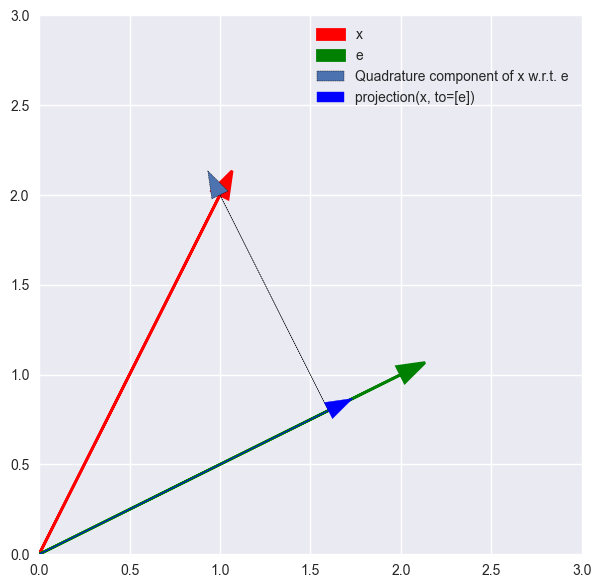

In [8]:
import matplotlib.pyplot as plt

with plt.style.context("seaborn-v0_8"):
    plt.figure(figsize=(7, 7))
    plt.xlim([-0, 3])
    plt.ylim([-0, 3])
    plt.arrow(0, 0, x[0], x[1], head_width=0.1, color="r", label="x", linewidth=2)
    plt.arrow(0, 0, e[0], e[1], head_width=0.1, color="g", label="e", linewidth=2)
    plt.arrow(x_to_e[0], x_to_e[1], x[0] - x_to_e[0], x[1] - x_to_e[1], head_width=0.1, label = "Quadrature component of x w.r.t. e", linestyle="--")
    plt.arrow(0, 0, x_to_e[0], x_to_e[1], head_width=0.1, color="b", label="projection(x, to=[e])")
    plt.legend()
    plt.show()

In [24]:
np.allclose(np.dot(e, x - x_to_e), 0.0)

True

In [9]:
def gram_schmidt(vectors: List[np.ndarray]):
    """
    Creates an orthonormal set of vectors from the input
    that spans the same subspaces.
    """
    output = []
    
    # 1st step: finding an orthogonal set of vectors
    output.append(vectors[0])
    for v in vectors[1:]:
        v_proj = projection(v, to=output)
        output.append(v - v_proj)
    
    # 2nd step: normalizing the result
    output = [v/np.linalg.norm(v, ord=2) for v in output]
    
    return output 

In [10]:
gram_schmidt([np.array([2.0, 1.0, 1.0]), 
              np.array([1.0, 2.0, 1.0]),
              np.array([1.0, 1.0, 2.0])])

[array([0.81649658, 0.40824829, 0.40824829]),
 array([-0.49236596,  0.86164044,  0.12309149]),
 array([-0.30151134, -0.30151134,  0.90453403])]

In [11]:
test_vectors = [np.array([1.0, 0.0, 0.0]), 
                np.array([1.0, -1.0, 0.0]),
                np.array([1.0, 1.0, 1.0])]

In [12]:
gram_schmidt(test_vectors)

[array([1., 0., 0.]), array([ 0., -1.,  0.]), array([0., 0., 1.])]

## Matrices, the workhorses of linear algebra

### Matrices as arrays

In [14]:
from typing import Tuple


class Matrix:
    def __init__(self, shape: Tuple[int, int]):
        if len(shape) != 2:
            raise ValueError("The shape of a Matrix object must be a two-dimensional tuple.")
            
        self.shape = shape
        self.data = [0.0 for _ in range(shape[0]*shape[1])]    
    
    def _linear_idx(self, i: int, j: int):
        return i*self.shape[1] + j
    
    def __getitem__(self, key: Tuple[int, int]):
        linear_idx = self._linear_idx(*key)# * is unpacking operator that allows us to pass multiple arguments as a tuple
        return self.data[linear_idx]
        
    def __setitem__(self, key: Tuple[int, int], value):     
        linear_idx = self._linear_idx(*key)
        self.data[linear_idx] = value
        
    def __repr__(self):
        array_form = [
            [self[i, j] for j in range(self.shape[1])]
            for i in range(self.shape[0])
        ]
        return "\n".join(["\t".join([f"{x}" for x in row]) for row in array_form])

This `Matrix` class is a custom implementation for representing a two-dimensional matrix using a flat Python list. Here’s an explanation of each method:

---

### `__init__(self, shape: Tuple[int, int])`
This is the constructor.  
- It takes a tuple `shape` (number of rows, number of columns).
- It checks that the shape is two-dimensional.
- It initializes `self.shape` and creates a flat list `self.data` filled with zeros, with length equal to rows × columns.

---

### `_linear_idx(self, i: int, j: int)`
This is a helper method.  
- It converts two-dimensional indices `(i, j)` into a single index for the flat list.
- The formula is `i * number_of_columns + j`.

---

### `__getitem__(self, key: Tuple[int, int])`
This method allows you to access elements using `matrix[i, j]` syntax.
- It uses `_linear_idx` to find the correct position in the flat list.
- Returns the value at that position.

---

### `__setitem__(self, key: Tuple[int, int], value)`
This method allows you to assign values using `matrix[i, j] = value` syntax.
- It uses `_linear_idx` to find the correct position.
- Sets the value at that position in the flat list.

---

### `__repr__(self)`
This method defines how the matrix is displayed when you print it.
- It reconstructs the matrix as a list of lists (rows of values).
- It joins each row into a tab-separated string, and all rows into a newline-separated string.

---

**Summary:**  
Your class stores matrix data in a flat list, provides convenient access and assignment using standard indexing, and prints the matrix in a readable format.

In [15]:
M = Matrix(shape=(3, 4))

In [16]:
M[1, 2] = 3.14

In [17]:
M[1, 2]

3.14

In [18]:
M

0.0	0.0	0.0	0.0
0.0	0.0	3.14	0.0
0.0	0.0	0.0	0.0

Here are some useful magic (dunder) methods for Python classes:

- `__init__`: Constructor, called when you create an object.
- `__repr__`: Defines how the object is displayed (for debugging).
- `__str__`: Defines the string representation (for `print()`).
- `__getitem__`: Enables `obj[key]` access.
- `__setitem__`: Enables `obj[key] = value` assignment.
- `__len__`: Returns the length with `len(obj)`.
- `__iter__`: Makes the object iterable (for loops).
- `__eq__`, `__lt__`, `__gt__`, etc.: Comparison operators.
- `__add__`, `__sub__`, `__mul__`, etc.: Arithmetic operators.
- `__call__`: Makes the object callable like a function.
- `__contains__`: Enables `in` checks (`x in obj`).

These let you customize how your class interacts with Python’s built-in syntax and functions.

In [19]:
# Demo: Useful Python magic (dunder) methods in a custom class

class Demo:
    def __init__(self, items):
        # __init__: called when you create an object
        self.items = list(items)

    def __repr__(self):
        # __repr__: unambiguous string for debugging
        return f"Demo({self.items})"

    def __str__(self):
        # __str__: readable string for print()
        return f"Demo with items: {self.items}"

    def __getitem__(self, index):
        # __getitem__: enables obj[index]
        return self.items[index]

    def __setitem__(self, index, value):
        # __setitem__: enables obj[index] = value
        self.items[index] = value

    def __len__(self):
        # __len__: enables len(obj)
        return len(self.items)

    def __iter__(self):
        # __iter__: enables iteration in for loops
        return iter(self.items)

    def __eq__(self, other):
        # __eq__: enables obj1 == obj2
        return self.items == other.items

    def __add__(self, other):
        # __add__: enables obj1 + obj2
        return Demo(self.items + other.items)

    def __call__(self, x):
        # __call__: enables obj(x)
        return x in self.items

    def __contains__(self, x):
        # __contains__: enables x in obj
        return x in self.items

# Usage examples
d1 = Demo([1, 2, 3])
d2 = Demo([4, 5])

print(repr(d1))         # __repr__
print(str(d1))          # __str__
print(d1[1])            # __getitem__
d1[1] = 42              # __setitem__
print(d1.items)
print(len(d1))          # __len__

for item in d1:         # __iter__
    print(item)

print(d1 == Demo([1, 42, 3]))  # __eq__
d3 = d1 + d2            # __add__
print(d3)

print(d1(42))           # __call__
print(1 in d1)          #

Demo([1, 2, 3])
Demo with items: [1, 2, 3]
2
[1, 42, 3]
3
1
42
3
True
Demo with items: [1, 42, 3, 4, 5]
True
True


### Matrices in NumPy

In [20]:
import numpy as np

A = np.array([[0, 1, 2, 3],
              [4, 5, 6, 7],
              [8, 9, 10, 11]])

B = np.array([[5, 5, 5, 5],
              [5, 5, 5, 5],
              [5, 5, 5, 5]])

In [21]:
A

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [22]:
A + B       # pointwise addition

array([[ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

In [23]:
A*B         # pointwise multiplication

array([[ 0,  5, 10, 15],
       [20, 25, 30, 35],
       [40, 45, 50, 55]])

In [24]:
np.exp(A)   # pointwise application of the exponential function

array([[1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01],
       [5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03],
       [2.98095799e+03, 8.10308393e+03, 2.20264658e+04, 5.98741417e+04]])

In [25]:
np.transpose(A)

array([[ 0,  4,  8],
       [ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11]])

In [26]:
A.T         # is the same as np.transpose(A)

array([[ 0,  4,  8],
       [ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11]])

In [27]:
A[1, 2]    # 1st row, 2nd column (if we index rows and columns from zero)

np.int64(6)

In [28]:
A[:, 2]    # 2nd column

array([ 2,  6, 10])

In [29]:
A[1, :]    # 1st row

array([4, 5, 6, 7])

In [69]:
A[2, 1:4]   # 2nd row, 1st-4th elements

array([ 9, 10, 11])

In [33]:
np.all(A[1]  == A[1,:])      # 1st row

np.True_

In [34]:
for row in A:
    print(row)

[0 1 2 3]
[4 5 6 7]
[ 8  9 10 11]


In [72]:
np.zeros(shape=(4, 5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [35]:
A = np.array([[0, 1, 2, 3],
              [4, 5, 6, 7],
              [8, 9, 10, 11]])

In [74]:
A

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [36]:
A.shape

(3, 4)

In [37]:
A.reshape(6, 2)    # reshapes A into a 6 x 2 matrix

array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11]])

In [41]:
A

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [39]:
A.reshape(-1, 2)

array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11]])

In [40]:
A.reshape(-1, 4)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

### Matrix multiplication, revisited

In [80]:
from itertools import product


def matrix_multiplication(A: np.ndarray, B: np.ndarray):
    # checking if multiplication is possible
    if A.shape[1] != B.shape[0]:
        raise ValueError("The number of columns in A must match the number of rows in B.")
    
    # initializing an array for the product
    AB = np.zeros(shape=(A.shape[0], B.shape[1]))
    
    # calculating the elements of AB
    for i, j in product(range(A.shape[0]), range(B.shape[1])):
        AB[i, j] = np.sum(A[i, :]*B[:, j])
        
    return AB

In [81]:
A = np.ones(shape=(4, 6))
B = np.ones(shape=(6, 3))

In [82]:
matrix_multiplication(A, B)

array([[6., 6., 6.],
       [6., 6., 6.],
       [6., 6., 6.],
       [6., 6., 6.]])

In [83]:
np.matmul(A, B)

array([[6., 6., 6.],
       [6., 6., 6.],
       [6., 6., 6.],
       [6., 6., 6.]])

In [84]:
for _ in range(100):
    n, m, l = np.random.randint(1, 100), np.random.randint(1, 100), np.random.randint(1, 100)
    A = np.random.rand(n, m)
    B = np.random.rand(m, l)
    
    if not np.allclose(np.matmul(A, B), matrix_multiplication(A, B)):
        print(f"Result mismatch for\n{A}\n and\n{B}")
        break
else:
    print("All good! Yay!")

All good! Yay!


In [85]:
A = np.ones(shape=(4, 6))
B = np.ones(shape=(6, 3))

np.allclose(A @ B, np.matmul(A, B))

True

### Matrices and data

In [86]:
x1 = np.array([2, 0, 0, 0])       # first data point
x2 = np.array([-1, 1, 0, 0])      # second data point

A = np.array([[0, 1, 2, 3],
              [4, 5, 6, 7],
              [8, 9, 10, 11]])    # a feature transformation

In [87]:
A.shape

(3, 4)

In [88]:
x1.shape

(4,)

In [89]:
np.matmul(A, x1)

array([ 0,  8, 16])

In [90]:
np.hstack([x1, x2])    # np.hstack takes a list of np.ndarrays as its argument

array([ 2,  0,  0,  0, -1,  1,  0,  0])

In [91]:
# x.reshape(-1,1) turns x into a column vector
data = np.hstack([x1.reshape(-1, 1), x2.reshape(-1, 1)])

In [92]:
data

array([[ 2, -1],
       [ 0,  1],
       [ 0,  0],
       [ 0,  0]])

In [93]:
np.matmul(A, data)

array([[ 0,  1],
       [ 8,  1],
       [16,  1]])

## Problems

**Problem 3.**

In [94]:
def p_norm(x: np.ndarray, p: float):
    if p >= 1:
        return (np.sum(np.abs(x)**p))**(1/p)
    elif np.isinf(p):
        return np.max(np.abs(x))
    else:
        raise ValueError("p must be a float larger or equal than 1.0 or inf.")